In [141]:
#%matplotlib qt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load Data 

In [142]:
df = pd.read_csv("mail_data.csv", encoding="utf-8")

Explore Data

In [143]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [144]:
df.shape

(5572, 2)

In [145]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [146]:
df.drop_duplicates().head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [147]:
df= df.rename(columns={'Category':'Label'})

In [148]:
df['Size'] = df ['Message'].apply(len)
df

,Label,Message,Size
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


Plotting

<Axes: ylabel='Frequency'>

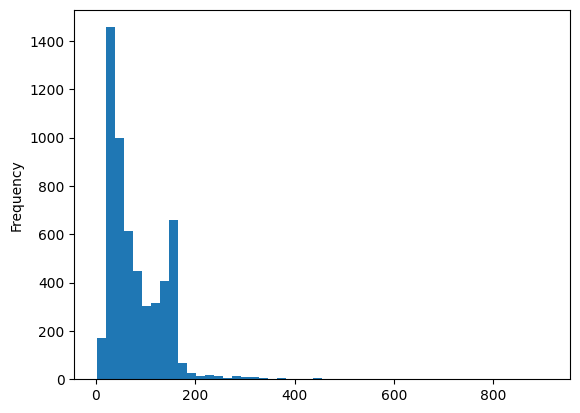

In [149]:
df['Size'].plot(bins=50, kind='hist')

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

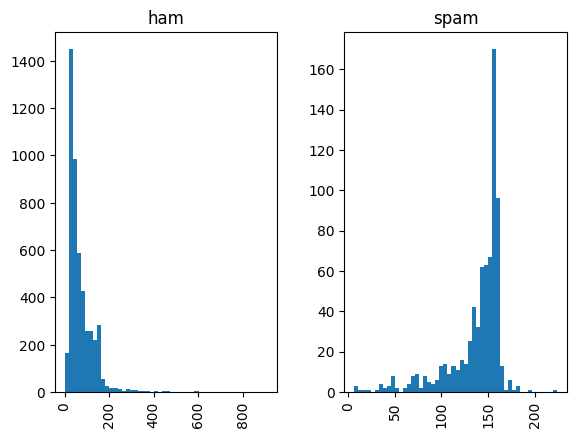

In [150]:
df.hist(column='Size', by='Label',bins=50)

Label Encoding

In [151]:
#spam : 1
#ham  : 0
df['Label'] = df.Label.map({'spam':1,'ham':0})

In [152]:
#separate the datasets

X = df['Message']
Y = df['Label']

Splitting of Data | Bags of Words

In [153]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

count = CountVectorizer()
count

CountVectorizer()

In [154]:
X = count.fit_transform(X)

In [155]:
x_train, x_test,y_train,y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [156]:
print(x_train.shape)
print(x_test.shape)

(3900, 8709)
(1672, 8709)


Model Training

In [157]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
model = BernoulliNB()
model1 = MultinomialNB()

In [158]:
model.fit(x_train, y_train)
model1.fit(x_train, y_train)

MultinomialNB()

Predict the Data

In [159]:
predict = model.predict(x_test)
predict1 = model1.predict(x_test)

In [160]:
print(predict)
print(predict1)

[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]


Evaluation

In [161]:
from sklearn.metrics import recall_score, accuracy_score, precision_score,f1_score

In [162]:
print("=======================BernoulliNB==============================")
print("Recall Score: {} ".format(recall_score(y_test, predict)))
print("Accuracy Score: {} ".format(accuracy_score(y_test, predict)))
print("F1-score: {} ".format(f1_score(y_test, predict)))
print("Precision Score: {} ".format(precision_score(y_test,predict)))
print("==================================================================")

=======================BernoulliNB==============================
Recall Score: 0.8660714285714286 
Accuracy Score: 0.9802631578947368 
F1-score: 0.9216152019002375 
Precision Score: 0.9847715736040609 


In [163]:
print("=========================MultinomialNB============================")

print("Recall Score: {} ".format(recall_score(y_test, predict1)))
print("Accuracy Score: {} ".format(accuracy_score(y_test, predict1)))
print("F1-score: {} ".format(f1_score(y_test, predict1)))
print("Precision Score: {} ".format(precision_score(y_test,predict1)))

=========================MultinomialNB============================
Recall Score: 0.9598214285714286 
Accuracy Score: 0.9850478468899522 
F1-score: 0.9450549450549451 
Precision Score: 0.9307359307359307 


Building the predictive Training

In [164]:
input = [" "]

In [165]:
input = count.transform(input)

In [166]:
pred = model.predict(input)

In [167]:
print(pred)

[0]


In [168]:

if (pred[0]==1):
  print('That is a Spam Mail')

else:
  print('That is a Ham Mail')

That is a Ham Mail
